In [10]:
#:: 4th February 2023

In [11]:
!pip install -Uq diffusers transformers fastcore

In [12]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from diffusers import StableDiffusionPipeline
from fastcore.all import concat
from huggingface_hub import notebook_login
from PIL import Image

logging.disable(logging.WARNING)

torch.manual_seed(1)
if not (Path.home()/'.huggingface'/'token').exists(): notebook_login()

##### Image to Image Diffusion

In [13]:
from diffusers import StableDiffusionImg2ImgPipeline
from fastdownload import FastDownload

In [14]:
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16",
    torch_dtype=torch.float16,
).to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

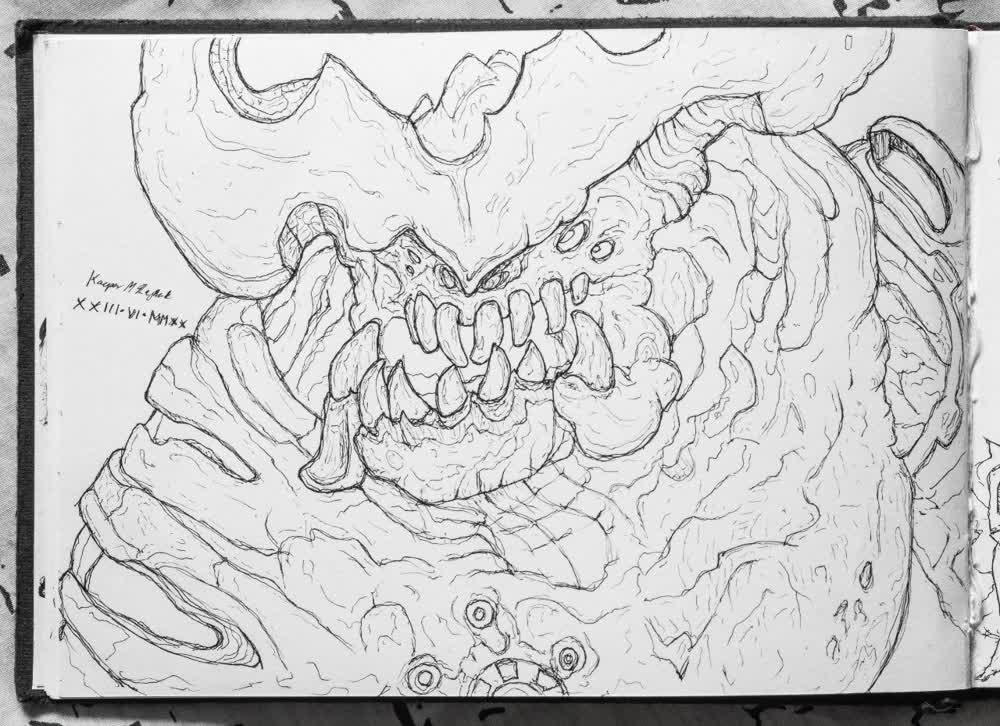

In [15]:
p = './my_sketches/doom_sketch_downscaled.jpg'
init_image = Image.open(p).convert("RGB")
init_image

In [16]:
def image_grid(imgs, rows, cols):
    w,h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs): grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [23]:
torch.manual_seed(1000)
prompt = "Doom demon in photorealistic 4K as an inked sketch with calligraphic lines"
images = pipe(prompt=prompt,image=init_image, num_images_per_prompt=1, strength=0.8, num_inference_steps=50).images

  0%|          | 0/40 [00:00<?, ?it/s]

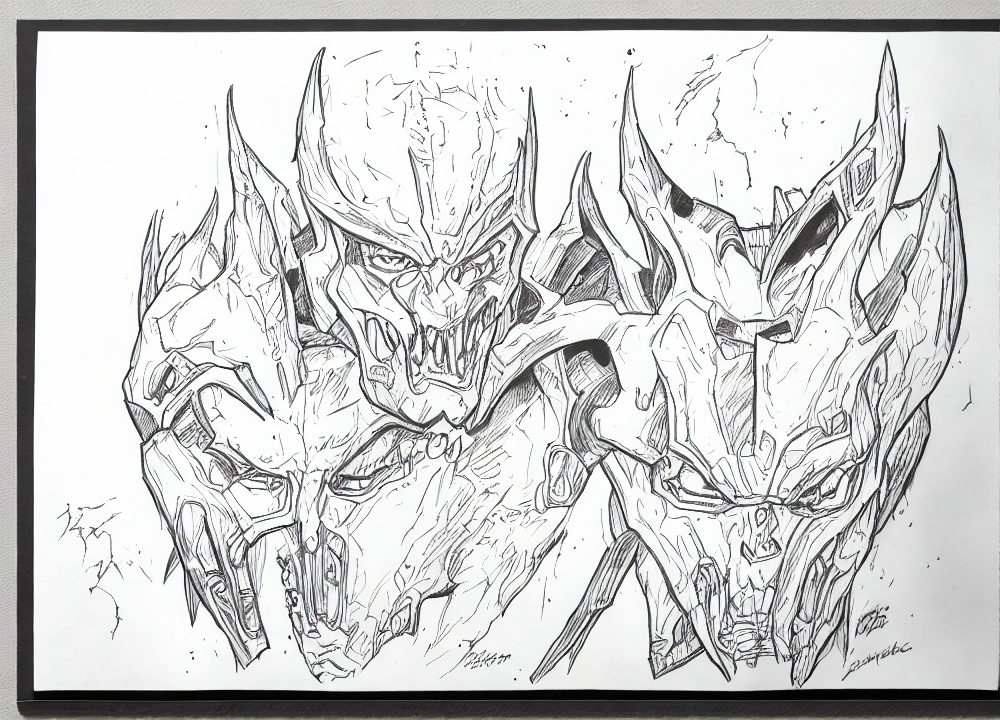

In [24]:
image_grid(images, rows=1, cols=1)